# 0.2 Data Exploration

In [1]:
%load_ext autoreload
%autoreload 2

## Libraries

In [11]:
import final_project.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import final_project.visualization.visualize as visualize

## Explore data

### Read data

In [4]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [5]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168237 entries, 0 to 168236
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  168237 non-null  object
 1   date            168237 non-null  object
 2   value           168237 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [6]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


In [7]:
sns.set_style("whitegrid")

In [8]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [9]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
6,Argentina,2020-01-22,0
30,Brazil,2020-01-22,0
57,Chile,2020-01-22,0


### Ploting and visualizing data

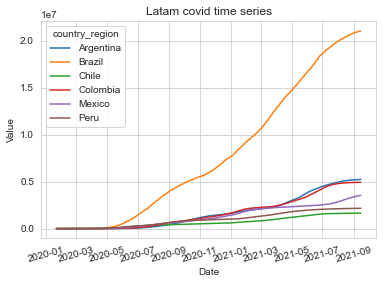

In [12]:
visualize.covid_time_series(some_latam_countries_df)

In [13]:
visualize.top_countries(processed_covid_df, countries,11)

,country_region,value,color
0,US,9947416163,lightblue
1,India,6629604119,lightblue
2,Brazil,4758911471,red
3,Russia,1584208513,lightblue
4,France,1532231073,lightblue
5,United Kingdom,1400397223,lightblue
6,Turkey,1248491726,lightblue
7,Spain,1115001527,lightblue
8,Italy,1112084594,lightblue
9,Argentina,1019543819,red


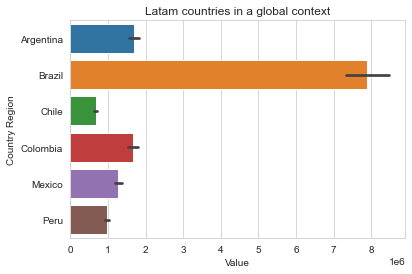

In [17]:
visualize.covid_bar_chart(some_latam_countries_df)